# Assignment 7

Please answer each question to the corresponding question cell below. Your final code must have the code as well as the output of your code. You can use Saint Peter's [Azure Databricks](https://adb-7130196131129306.6.azuredatabricks.net/?o=7130196131129306#) to do this assignment.

## Questions

Use the following data to do the next questions. In this assignment, you will be building a linear regression model, and you will test your model.

In [0]:
display(dbutils.fs.ls('/databricks-datasets/wine-quality'))

path,name,size,modificationTime
dbfs:/databricks-datasets/wine-quality/README.md,README.md,1066,1594262736000
dbfs:/databricks-datasets/wine-quality/winequality-red.csv,winequality-red.csv,84199,1594262736000
dbfs:/databricks-datasets/wine-quality/winequality-white.csv,winequality-white.csv,264426,1594262736000


### Q1

Import the file `winequality-white.csv` as a Spark DataFrame. Make sure to properly parse data into multiple columns, and assign right schema values.

In [0]:
filePath = """/databricks-datasets/wine-quality/winequality-white.csv"""
winequalityDF = spark.read.options(inferSchema='True',delimiter=';', header = "true").csv(filePath)
winequalityDF.show()

+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+
fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density| pH|sulphates|alcohol|quality|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+
 7.0| 0.27| 0.36| 20.7| 0.045| 45.0| 170.0| 1.001| 3.0| 0.45| 8.8| 6|
 6.3| 0.3| 0.34| 1.6| 0.049| 14.0| 132.0| 0.994| 3.3| 0.49| 9.5| 6|
 8.1| 0.28| 0.4| 6.9| 0.05| 30.0| 97.0| 0.9951|3.26| 0.44| 10.1| 6|
 7.2| 0.23| 0.32| 8.5| 0.058| 47.0| 186.0| 0.9956|3.19| 0.4| 9.9| 6|
 7.2| 0.23| 0.32| 8.5| 0.058| 47.0| 186.0| 0.9956|3.19| 0.4| 9.9| 6|
 8.1| 0.28| 0.4| 6.9| 0.05| 30.0| 97.0| 0.9951|3.26| 0.44| 10.1| 6|
 6.2| 0.32| 0.16| 7.0| 0.045| 30.0| 136.0| 0.9949|3.18| 0.47| 9.6| 6|
 7.0| 0.27| 0.36| 20.7| 0.045| 45.0| 170.0| 1.001| 3.0| 0.45| 8.8| 6|
 6.3| 0.3| 0.34| 1.6| 0.049| 14.0| 132.0| 0.994| 3.3| 0.49| 9.5| 6|
 8.1| 0.22| 0.43| 1.5| 0.044| 28.0| 129.0| 0.9938|3.22| 0.45| 11.0| 6|
 8.1| 0.27| 0.41| 1.45| 0.033| 11.0| 63.0| 0.9908|2.99| 0.56| 12.0| 5|
 8.6| 0.23| 0.4| 4.2| 0.035| 17.0| 109.0| 0.9947|3.14| 0.53| 9.7| 5|
 7.9| 0.18| 0.37| 1.2| 0.04| 16.0| 75.0| 0.992|3.18| 0.63| 10.8| 5|
 6.6| 0.16| 0.4| 1.5| 0.044| 48.0| 143.0| 0.9912|3.54| 0.52| 12.4| 7|
 8.3| 0.42| 0.62| 19.25| 0.04| 41.0| 172.0| 1.0002|2.98| 0.67| 9.7| 5|
 6.6| 0.17| 0.38| 1.5| 0.032| 28.0| 112.0| 0.9914|3.25| 0.55| 11.4| 7|
 6.3| 0.48| 0.04| 1.1| 0.046| 30.0| 99.0| 0.9928|3.24| 0.36| 9.6| 6|
 6.2| 0.66| 0.48| 1.2| 0.029| 29.0| 75.0| 0.9892|3.33| 0.39| 12.8| 8|
 7.4| 0.34| 0.42| 1.1| 0.033| 17.0| 171.0| 0.9917|3.12| 0.53| 11.3| 6|
 6.5| 0.31| 0.14| 7.5| 0.044| 34.0| 133.0| 0.9955|3.22| 0.5| 9.5| 5|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+
only showing top 20 rows

In [0]:
winequalityDF.printSchema()

root
-- fixed acidity: double (nullable = true)
-- volatile acidity: double (nullable = true)
-- citric acid: double (nullable = true)
-- residual sugar: double (nullable = true)
-- chlorides: double (nullable = true)
-- free sulfur dioxide: double (nullable = true)
-- total sulfur dioxide: double (nullable = true)
-- density: double (nullable = true)
-- pH: double (nullable = true)
-- sulphates: double (nullable = true)
-- alcohol: double (nullable = true)
-- quality: integer (nullable = true)

In [0]:
winequalityDF.describe().toPandas().transpose()

Out[5]:

,0,1,2,3,4
summary,count,mean,stddev,min,max
fixed acidity,4898,6.854787668436075,0.8438682276875127,3.8,14.2
volatile acidity,4898,0.27824111882401087,0.10079454842486532,0.08,1.1
citric acid,4898,0.33419150673743736,0.12101980420298254,0.0,1.66
residual sugar,4898,6.391414863209486,5.072057784014878,0.6,65.8
chlorides,4898,0.0457723560636995,0.021847968093728805,0.009,0.346
free sulfur dioxide,4898,35.30808493262556,17.00713732523259,2.0,289.0
total sulfur dioxide,4898,138.36065741118824,42.498064554142985,9.0,440.0
density,4898,0.9940273764801896,0.002990906916936997,0.98711,1.03898
pH,4898,3.1882666394446693,0.15100059961506673,2.72,3.82


### Q2 

Show the distinct values of `quality` column. This is your label column.

In [0]:
winequalityDF.select("quality").distinct().sort('quality').show()

+-------+
quality|
+-------+
 3|
 4|
 5|
 6|
 7|
 8|
 9|
+-------+

### Q3

Split the data into train and test sets. Use 42 as your seed number to be able to reproduce the same results next time the notebook gets run.

In [0]:
trainDF, testDF = winequalityDF.randomSplit([.8, .2], seed=42)
print(f"train: {trainDF.count()} - test {testDF.count()}")

train: 3961 - test 937

### Q4

Select a couple of the columns from the dataset to build a feature vector to prepare linear regression. Use `VectorAssembler` to transform your train dataset. Show a few rows of the output of the VectorAssembler.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

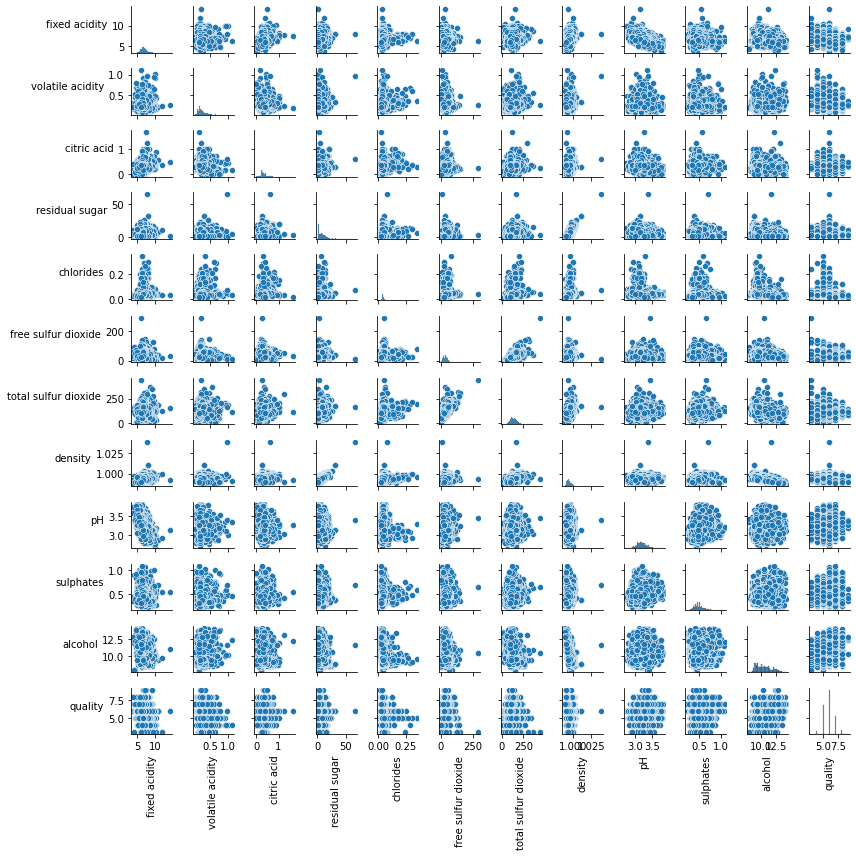

In [0]:
# Create the default pairplot using seaborn
g =sns.pairplot(winequalityDF.toPandas(), height =1)
for ax in g.axes.flat:
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.tight_layout()
plt.show()

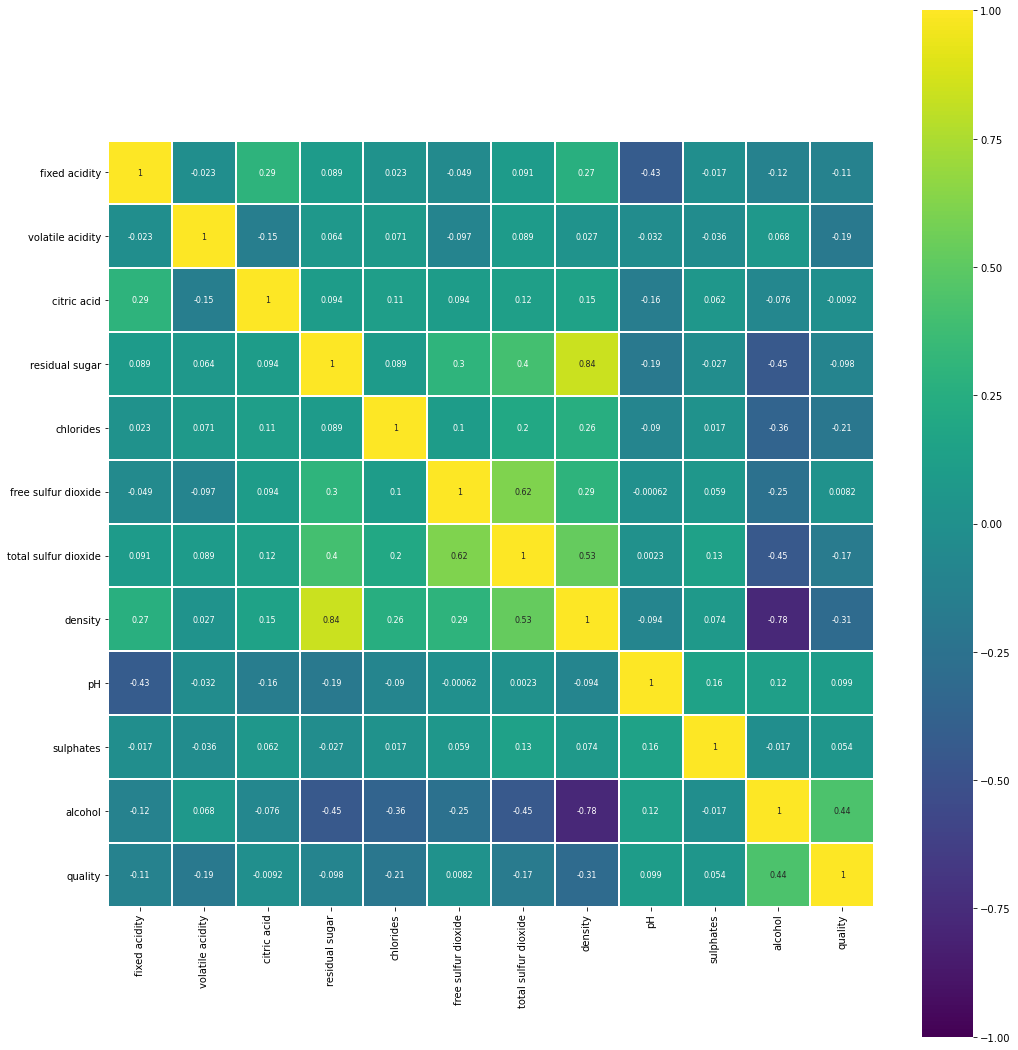

In [0]:
# correlation heatmap
corr = winequalityDF.toPandas().corr()
plt.figure(figsize=(15, 15))

sns.heatmap(corr
#             [(corr >= 0.6) | (corr <= -0.6)]
            , 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.tight_layout()

In [0]:
inputCols= [x for x in winequalityDF.columns if x != 'quality']
inputCols

Out[11]: ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [0]:
from pyspark.ml.feature import VectorAssembler

vecAssembler = VectorAssembler(inputCols=inputCols, outputCol='features')

In [0]:
vecTrainDF = vecAssembler.transform(trainDF)
vecTrainDF.show(5)

+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+--------------------+
fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density| pH|sulphates|alcohol|quality| features|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+--------------------+
 3.8| 0.31| 0.02| 11.1| 0.036| 20.0| 114.0|0.99248|3.75| 0.44| 12.4| 6|[3.8,0.31,0.02,11...|
 3.9| 0.225| 0.4| 4.2| 0.03| 29.0| 118.0| 0.989|3.57| 0.36| 12.8| 8|[3.9,0.225,0.4,4....|
 4.2| 0.215| 0.23| 5.1| 0.041| 64.0| 157.0|0.99688|3.42| 0.44| 8.0| 3|[4.2,0.215,0.23,5...|
 4.4| 0.32| 0.39| 4.3| 0.03| 31.0| 127.0|0.98904|3.46| 0.36| 12.8| 8|[4.4,0.32,0.39,4....|
 4.4| 0.46| 0.1| 2.8| 0.024| 31.0| 111.0|0.98816|3.48| 0.34| 13.1| 6|[4.4,0.46,0.1,2.8...|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+--------------------+
only showing top 5 rows

### Q5

Apply linear regression to your train set. Show model coefficients and the intercept.

In [0]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol='features', labelCol='quality')
lrModel = lr.fit(vecTrainDF)

In [0]:
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

Coefficients: [0.12111155583187683,-1.8496249314525237,0.02396334470176662,0.10093661920642778,0.006364889985675615,0.003597239297141057,-8.225175638895433e-06,-211.4468034875139,0.8500979438681696,0.7683413442824735,0.12338169363488159]
Intercept: 210.58807940348194

In [0]:
trainingSummary = lrModel.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 0.749885
r2: 0.285258

### Q6

Transform your train dataset with the linear model and show `quality` and `prediction`. Show only 10 rows.

In [0]:
lr_predictions = lrModel.transform(vecTrainDF)
lr_predictions.select('quality', 'prediction').show(10, truncate=False)

+-------+------------------+
quality|prediction |
+-------+------------------+
6 |6.866178535712294 |
8 |6.951157888714675 |
3 |4.893929075838486 |
8 |6.751005132664773 |
6 |6.558519584109803 |
5 |5.316376500251465 |
6 |6.5880002952610255|
5 |5.737490645843081 |
7 |6.928504369525939 |
5 |6.039224766064734 |
+-------+------------------+
only showing top 10 rows

### Q7

Evaluate your model with `RegressionEvaluator`. Show Root Mean Square Error (RMSE) and R-squared value to demonstrate model's performance.

In [0]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[vecAssembler, lr])
pipelineModel = pipeline.fit(trainDF)

In [0]:
predDF = pipelineModel.transform(testDF)
predDF.select('quality', 'prediction').show(10)

+-------+------------------+
quality| prediction|
+-------+------------------+
 7| 7.243068632003826|
 7| 6.158180151610566|
 5|5.1717170090711875|
 6| 6.248622707121228|
 6| 6.231223693808374|
 6| 5.740477147501849|
 6| 5.93431007771602|
 7| 6.874115485159535|
 6| 5.698786589238864|
 6| 5.989417952826727|
+-------+------------------+
only showing top 10 rows

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator_r2 = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="quality",metricName="r2")
lr_evaluator_rmse = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="quality",metricName="rmse")                                  
print("Root mean squared error on training data = %g" % lr_evaluator_rmse.evaluate(predDF))                                 
print("R Squared (R2) on training data = %g" % lr_evaluator_r2.evaluate(predDF))

Root mean squared error on training data = 0.758146
R Squared (R2) on training data = 0.254072

## Notes

After done with the assignment, please upload your work to the blackboard. Please make sure you upload:

- The outputs of the code in the notebook
- The pdf version of the notebook

Best of luck!